SAME Script as previous, just substitute in order for family

In [14]:
#pip install pandas

In [24]:
import numpy as np

In [16]:
import pandas as pd

In [17]:
#pip install scikit_posthocs

In [18]:
from scikit_posthocs import posthoc_dunn

In [21]:
#pip install seaborn

In [23]:
#pip install numpy

In [32]:
import scipy.stats as stats

Load into dataframes

BVIRUS

bvirus - Contains only VIRUSES filtered from bigtable

In [25]:
bvirus = pd.read_csv('all.bigtable.virus.tsv.gz', compression='gzip', header=0, sep='\t')
bvirus

,seqID,sampleID,count,CPM,alnType,targetID,evalue,pident,fident,nident,...,taxMethod,kingdom,phylum,class,order,family,genus,species,baltimoreType,baltimoreGroup
0,ERR1163130:1:335952,ERR1163130,1,2.034427,aa,A0A1B1IVR3,6.767000e-12,81.0,0.810,30,...,LCA,Viruses,unclassified Viruses phylum,unclassified Viruses class,unclassified Viruses order,unclassified Viruses family,unclassified Viruses genus,uncultured Mediterranean phage,NaN,NaN
1,ERR1163130:1:335970,ERR1163130,1,2.034427,aa,B5TA67,1.893000e-12,83.7,0.837,31,...,LCA,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,unclassified Myoviridae genus,Burkholderia phage KS10,dsDNA,I
2,ERR1163130:1:335994,ERR1163130,1,2.034427,aa,A0A516LPG6,3.260000e-15,89.1,0.891,33,...,LCA,Viruses,unclassified Viruses phylum,unclassified Viruses class,unclassified Viruses order,unclassified Viruses family,unclassified Viruses genus,Prokaryotic dsDNA virus sp.,NaN,NaN
3,ERR1158211:12:97127,ERR1158211,12,26.003519,aa,A0A6B9J9N2,6.299000e-14,100.0,1.000,33,...,TopHit,Viruses,Hofneiviricota,Faserviricetes,Tubulavirales,Inoviridae,unclassified Inoviridae genus,Pseudomonas phage pf8_ST274-AUS411,ssDNA,II
4,ERR1158211:1:112033,ERR1158211,1,2.166960,aa,A0A481V2Q7,8.034000e-13,100.0,1.000,33,...,TopHit,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Casadabanvirus,Pseudomonas phage vB_Pae_BR58b,dsDNA,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452163,SRR6865467:1:69095,SRR6865467,1,3.782205,nt,tid|2664399|MN270269.1,8.081000e-73,98.6,0.986,0,...,LCA,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,unclassified Siphoviridae genus,unclassified Siphoviridae species,dsDNA,I
11452164,SRR687875:2:11822,SRR687875,2,34.465526,nt,tid|35277|DD160220.1,2.254000e-44,98.0,0.980,0,...,LCA,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,unclassified Retroviridae genus,unclassified Retroviridae species,ssRNA-RT,VI
11452165,SRR687875:1:12051,SRR687875,1,17.232763,nt,tid|11801|M16686.1,2.618000e-14,100.0,1.000,0,...,LCA,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,unclassified Retroviridae genus,unclassified Retroviridae species,ssRNA-RT,VI
11452166,SRR687875:2:12282,SRR687875,2,34.465526,nt,tid|11676|MK458165.1,5.459000e-16,90.6,0.906,0,...,TopHit,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Lentivirus,Human immunodeficiency virus 1,ssRNA-RT,VI


In [26]:
# fliter
bvirusfilt = bvirus[(bvirus.alnType=='aa') & (bvirus.evalue<1e-20)]
# group
bvirusfiltgroup = bvirusfilt.groupby(by=['sampleID', 'genus'], as_index=False).agg('sum','normCount')
bvirusfiltgroup

,sampleID,genus,count,CPM,evalue,pident,fident,nident,mismatches,qcov,tcov,qstart,qend,qlen,tstart,tend,tlen,alnlen,bits
0,DRR046624,Pestivirus,2,6172.839506,1.691000e-26,100.0,1.000,48,0,0.954,0.192,2,145,151,109,156,250,144,108
1,DRR092712,Acionnavirus,1,2.064878,3.603000e-36,71.7,0.717,61,24,0.977,0.014,259,5,261,5417,5501,6064,255,138
2,DRR092712,Ahtivirus,1,2.064878,5.929000e-22,91.0,0.910,51,5,0.982,0.120,2,169,171,210,265,465,168,96
3,DRR092712,Anaposvirus,2,4.129757,2.362000e-29,181.1,1.811,135,13,1.995,0.671,3,445,445,297,443,532,444,264
4,DRR092712,Atlauavirus,1,2.064878,1.455000e-28,69.3,0.693,52,23,0.983,0.097,227,3,229,474,548,770,225,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55760,SRR7755274,unclassified Adenoviridae genus,1,2.017463,1.836000e-27,100.0,1.000,50,0,0.993,0.106,1,150,151,266,315,471,150,111
55761,SRR7755274,unclassified Myoviridae genus,1,2.017463,1.076000e-25,100.0,1.000,49,0,0.974,0.127,149,3,151,189,237,387,147,106
55762,SRR7755274,unclassified Phycodnaviridae genus,1,2.017463,3.914000e-22,95.8,0.958,46,2,1.000,0.623,1,144,144,28,75,77,144,96
55763,SRR7755274,unclassified Siphoviridae genus,18,36.314337,2.091406e-20,1600.8,16.008,778,97,17.602,2.598,1058,1633,2684,4124,4981,7778,2625,1750


In [27]:
# rename 'genus' to 'category'
bvirusfiltgroup.rename(columns = {'genus':'category'}, inplace = True)
# add prefix
dataFrameV = bvirusfiltgroup
dataFrameV.category = 'hecatomb_' + dataFrameV.category
# selection
fbvirus = dataFrameV[['sampleID', 'category', 'CPM']]

fbvirus

,sampleID,category,CPM
0,DRR046624,hecatomb_Pestivirus,6172.839506
1,DRR092712,hecatomb_Acionnavirus,2.064878
2,DRR092712,hecatomb_Ahtivirus,2.064878
3,DRR092712,hecatomb_Anaposvirus,4.129757
4,DRR092712,hecatomb_Atlauavirus,2.064878
...,...,...,...
55760,SRR7755274,hecatomb_unclassified Adenoviridae genus,2.017463
55761,SRR7755274,hecatomb_unclassified Myoviridae genus,2.017463
55762,SRR7755274,hecatomb_unclassified Phycodnaviridae genus,2.017463
55763,SRR7755274,hecatomb_unclassified Siphoviridae genus,36.314337


In [33]:
virusOV = fbvirus.groupby(by=['category'], as_index=False)['CPM'].agg('sum')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


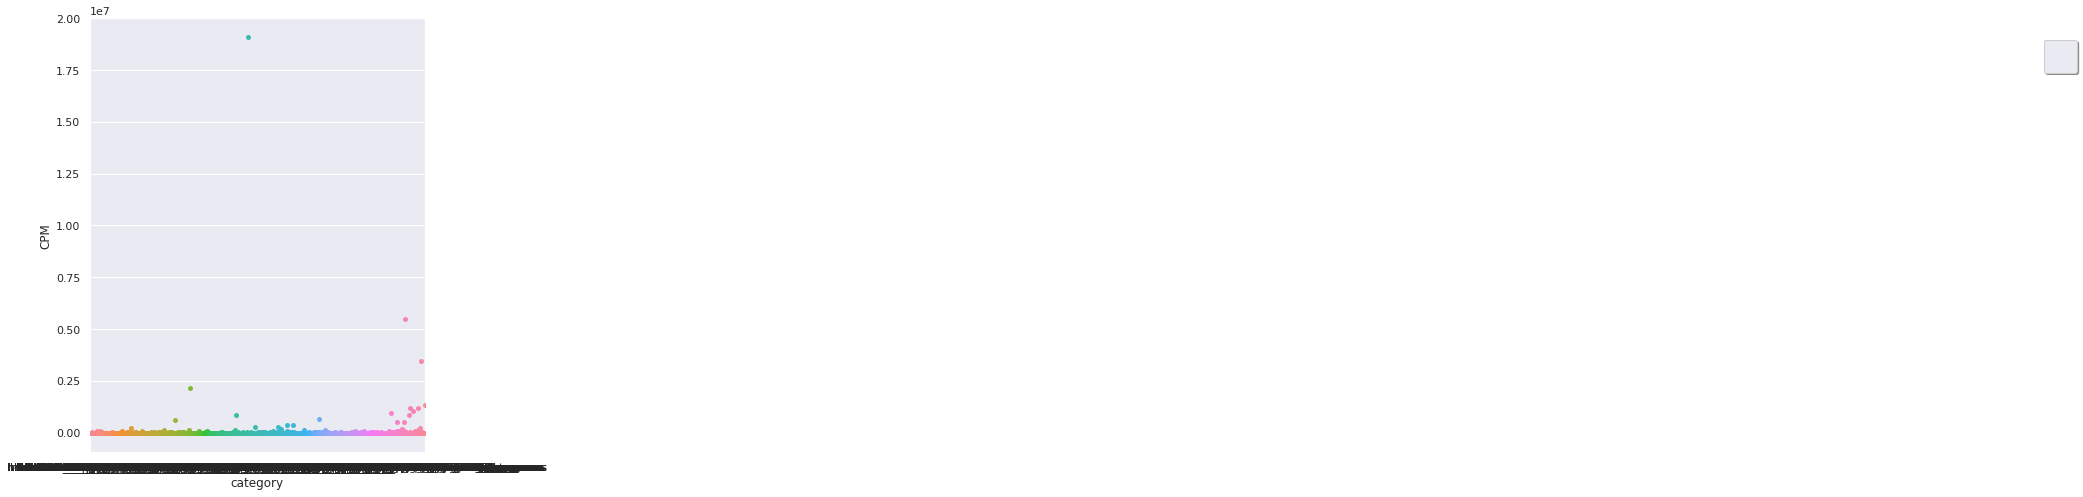

In [34]:
#plot
sns.set_style("darkgrid")
sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(6,8)})
sns.stripplot(x="category",
                    y="CPM",
                    data=virusOV, jitter=0.1)

plt.legend(bbox_to_anchor=(6.0,1), loc=0, borderaxespad=2,ncol=6, shadow=True, labelspacing=1.5, borderpad=1.5)
plt.show()

FOCUS

focus - taxonomic ID and quantification of BACTERIA
WANT sampleID, family, CPM

In [11]:
focus = pd.read_csv('all.focus.csv.gz', compression= 'gzip', header=None, sep=',')
focus

,0,1,2,3,4,5,6,7,8,9,10
0,DRR014244,Bacteria,Aquificae,Aquificae,Aquificales,Aquificaceae,Thermocrinis,Thermocrinis_albus,Thermocrinis_albus_DSM_14484_uid46231,4.093897,4.055526
1,DRR014244,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanothermobacter,Methanothermobacter_thermautotrophicus,Methanothermobacter_thermautotrophicus_Delta_H...,20.560174,18.746343
2,DRR014244,Bacteria,Cyanobacteria,Unknown Class,Prochlorales,Prochlorococcaceae,Prochlorococcus,Prochlorococcus_marinus,Prochlorococcus_marinus_MIT_9313_uid57773,0.653645,0.000000
3,DRR014244,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Oxalobacteraceae,Candidatus_Zinderia,Candidatus_Zinderia_insecticola,Candidatus_Zinderia_insecticola_CARI_uid52459,0.399269,0.473624
4,DRR014244,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,Helicobacter_mustelae,Helicobacter_mustelae_12198_uid46647,0.889852,1.138496
...,...,...,...,...,...,...,...,...,...,...,...
393742,SRR7755274,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_sp._CF50,Bacteroides_CF50_uid222805,1.726208,0.000000
393743,SRR7755274,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Myxococcaceae,Myxococcus,Myxococcus_stipitatus,Myxococcus_stipitatus_DSM_14675_uid186549,0.635165,0.000000
393744,SRR7755274,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Selenomonas,Selenomonas_sputigena,Selenomonas_sputigena_ATCC_35185_uid55329,6.142898,4.055780
393745,SRR7755274,Bacteria,Proteobacteria,Gammaproteobacteria,Cardiobacteriales,Cardiobacteriaceae,Dichelobacter,Dichelobacter_nodosus,Dichelobacter_nodosus_VCS1703A_uid57643,0.247214,0.000000


In [12]:
#Add column titles
focus.columns = ['sampleID', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain', 'R1perc', 'R2perc']
#Make new column - Convert Rperc1 to CPM
focus["CPM"] = focus['R1perc']*10000
# rename 'family' to 'category'
focus.rename(columns = {'genus':'category'}, inplace = True)
#Filter for bacterial hits - taking out archaea
focusfilt = focus[(focus.kingdom== 'Bacteria')]
# add prefix
dataFrameF = focusfilt.copy()
dataFrameF.category = 'focus_' + dataFrameF.category

ffocus= dataFrameF[['sampleID', 'category', 'CPM']]
ffocus

,sampleID,category,CPM
0,DRR014244,focus_Thermocrinis,40938.968023
2,DRR014244,focus_Prochlorococcus,6536.453886
3,DRR014244,focus_Candidatus_Zinderia,3992.685313
4,DRR014244,focus_Helicobacter,8898.524166
5,DRR014244,focus_Mycoplasma,1035.571977
...,...,...,...
393742,SRR7755274,focus_Bacteroides,17262.075461
393743,SRR7755274,focus_Myxococcus,6351.649279
393744,SRR7755274,focus_Selenomonas,61428.979163
393745,SRR7755274,focus_Dichelobacter,2472.140896


SFOCUS

sfocus - taxonomic ID via metabolic functions
WANT sampleID, Subsystem Level 3, CPM

In [14]:
sfocus  = pd.read_csv('all.superfocus.tsv.gz', compression='gzip', header=0, sep='\t')
sfocus

,sampleID,Subsystem Level 1,Subsystem Level 2,Subsystem Level 3,Function,R1 reads,R2 reads,R1 perc,R2 perc
0,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylaconitate_cis-trans_isomerase,24.833333,25.333333,0.008892,0.009090
1,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_(2-methyl-trans-ac...,1.700000,2.000000,0.000609,0.000718
2,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_FeS_dependent_(EC_...,37.700000,38.666667,0.013499,0.013874
3,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,4-hydroxyproline_epimerase_(EC_5.1.1.8),34.500000,36.500000,0.012353,0.013096
4,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,Alanine_racemase_(EC_5.1.1.1),79.000000,79.750000,0.028287,0.028615
...,...,...,...,...,...,...,...,...,...
50177510,SRR7755274,"Virulence, Disease and Defense",Invasion and intracellular resistance,MymA operon of Mycobacterium tuberculosis,Flavin-binding_family_monooxygenase,1.000000,0.000000,0.000913,0.000000
50177511,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Diphtheria toxin,diptheria_toxin_resistance_protein_required_fo...,0.250000,0.250000,0.000228,0.000233
50177512,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,ABC_transporter_ATP-binding_protein,0.000000,1.000000,0.000000,0.000933
50177513,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,Export_ABC_transporter_ATP-binding_protein,2.000000,0.000000,0.001825,0.000000


In [15]:
#Make new column - Convert Rperc1 to CPM
sfocus["CPM"] = sfocus['R1 perc']*10000
# rename 'Subsystem Level 3' to 'category'
sfocus.rename(columns = {'Subsystem Level 3':'category'}, inplace = True)
# add prefix
sfocus.category = 'super_' + sfocus.category
sfocusgroup = sfocus[['sampleID', 'category', 'CPM']]
sfocusgroup

,sampleID,category,CPM
0,ERR1158198,super_Amino acid racemase,88.919762
1,ERR1158198,super_Amino acid racemase,6.087125
2,ERR1158198,super_Amino acid racemase,134.990941
3,ERR1158198,super_Amino acid racemase,123.532824
4,ERR1158198,super_Amino acid racemase,282.872263
...,...,...,...
50177510,SRR7755274,super_MymA operon of Mycobacterium tuberculosis,9.125336
50177511,SRR7755274,super_Diphtheria toxin,2.281334
50177512,SRR7755274,super_Streptolysin S Biosynthesis and Transport,0.000000
50177513,SRR7755274,super_Streptolysin S Biosynthesis and Transport,18.250673


Concatenating to prepare for correlation

In [16]:
concat = pd.concat([fbvirus, ffocus, sfocusgroup])

In [17]:
concat

,sampleID,category,CPM
0,DRR046624,hecatomb_Pestivirus,6172.839506
1,DRR092712,hecatomb_Acionnavirus,2.064878
2,DRR092712,hecatomb_Ahtivirus,2.064878
3,DRR092712,hecatomb_Anaposvirus,4.129757
4,DRR092712,hecatomb_Atlauavirus,2.064878
...,...,...,...
50177510,SRR7755274,super_MymA operon of Mycobacterium tuberculosis,9.125336
50177511,SRR7755274,super_Diphtheria toxin,2.281334
50177512,SRR7755274,super_Streptolysin S Biosynthesis and Transport,0.000000
50177513,SRR7755274,super_Streptolysin S Biosynthesis and Transport,18.250673


In [18]:
outmatrixG = concat.pivot_table(index='sampleID', columns='category', values='CPM', fill_value=0)

In [19]:
outmatrixG

category,focus_Acaryochloris,focus_Acetobacter,focus_Acetobacterium,focus_Acetohalobium,focus_Acholeplasma,focus_Achromobacter,focus_Acidaminococcus,focus_Acidimicrobium,focus_Acidiphilium,focus_Acidithiobacillus,...,super_tRNA modification Archaea,super_tRNA modification yeast cytoplasmic,super_tRNA modification yeast mitochondrial,super_tRNA mods Archaea,super_tRNA nucleotidyltransferase,super_tRNA processing,super_tRNA splicing,super_tRNA-dependent amino acid transfers,super_tRNA-methylthiotransferase containing cluster,super_trimethylamine N-oxide (TMAO) reductase
sampleID,,,,,,,,,,,,,,,,,,,,,
DRR014244,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,202.423577,145.272055,26.413101,220.355963,48.424018,213.456986,0.000000,0.000000,0.000000,0.000000
DRR014245,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,206.094368,226.027762,79.774504,248.303100,0.000000,252.176071,0.000000,0.000000,0.000000,0.000000
DRR014246,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,224.709115,132.058528,13.205853,233.703577,13.205853,199.320339,0.000000,0.000000,0.000000,0.000000
DRR014247,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,191.294182,105.235464,210.470929,228.878277,0.000000,197.024175,0.000000,0.000000,0.000000,0.000000
DRR021439,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,36.063695,145.491958,117.172987,214.759809,28.578777,185.762053,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7687733,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,62.928061,0.000000,109.032962,58.058878,240.431659,104.178580,0.000000,54.843253,3.494646,5.591434
SRR769044,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,123.068869,0.000000,371.267914,99.952348,364.517588,188.665978,0.000000,842.665659,0.000000,1.125054
SRR7690497,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,48.605576,7.036619,300.756036,48.836237,72.632321,59.064770,10.553797,21.103066,16.438131,13.187718


In [20]:
outmatrixG.to_csv('Genus_subsys3.tsv', sep='\t')

In [ ]:
virusOV = outmatrixG.groupby(by=['category','family','sampleID'], as_index=False)['normCount'].agg('sum')